In [29]:
%%HTML
<iframe width="600" height="315" src="https://www.youtube.com/embed/yX8KuPZCAMo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>



In [32]:
%%HTML
<iframe width="600" height="315" src="https://www.youtube.com/embed/HW29067qVWk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [43]:
%%HTML
<a href="https://cs224d.stanford.edu/lectures/CS224d-Lecture7.pdf" target="_blank">Presentation</a>

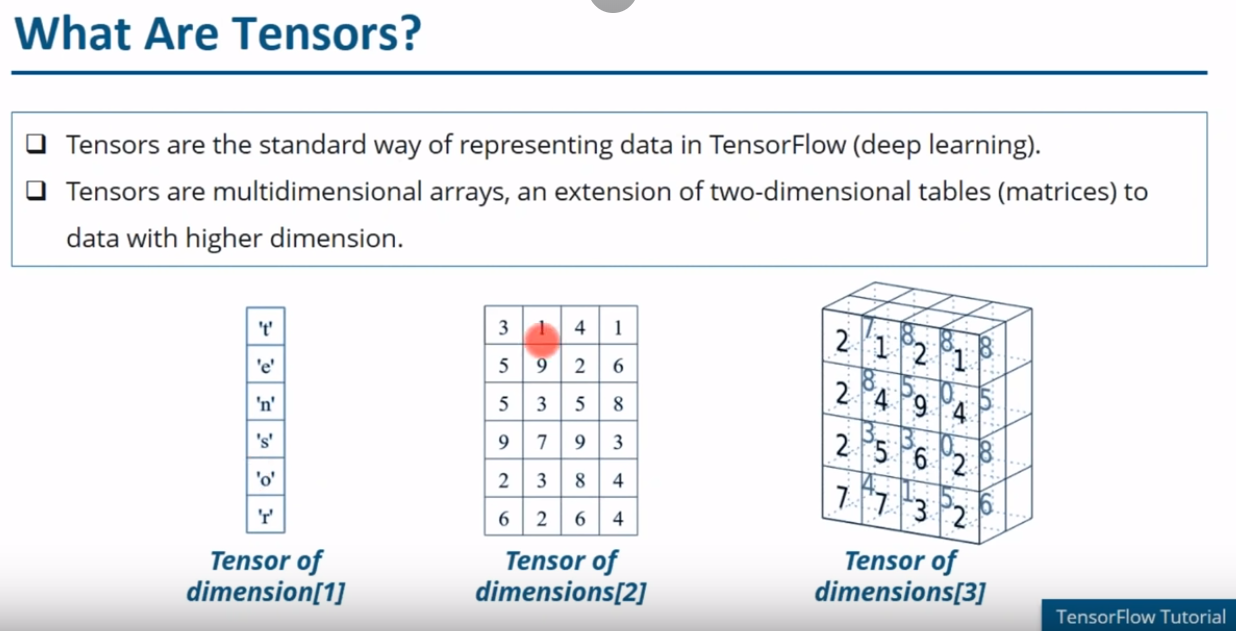

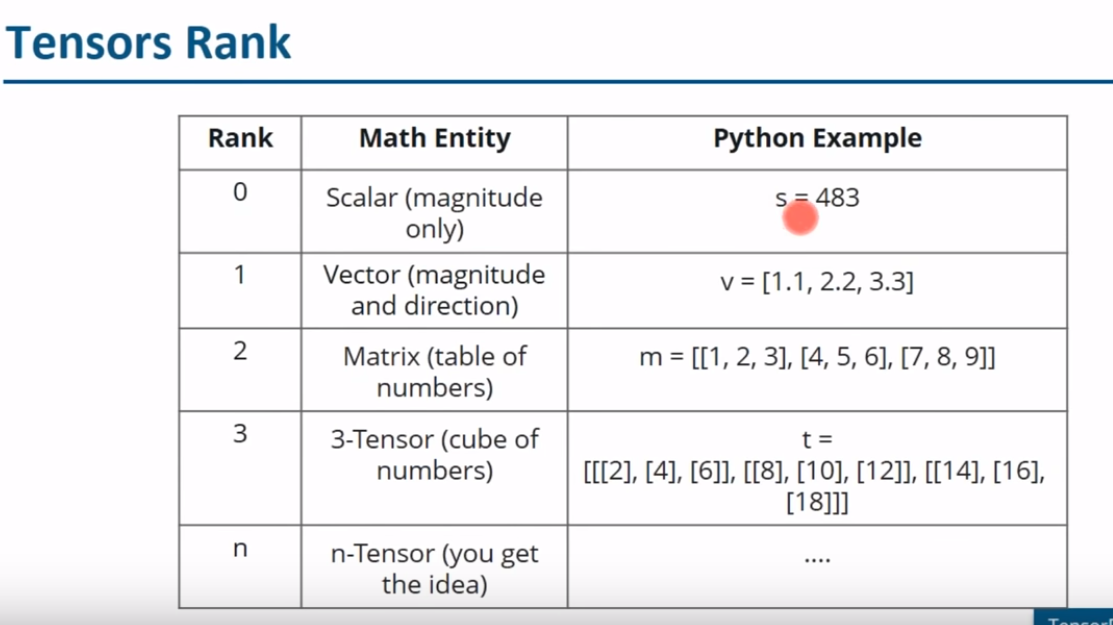


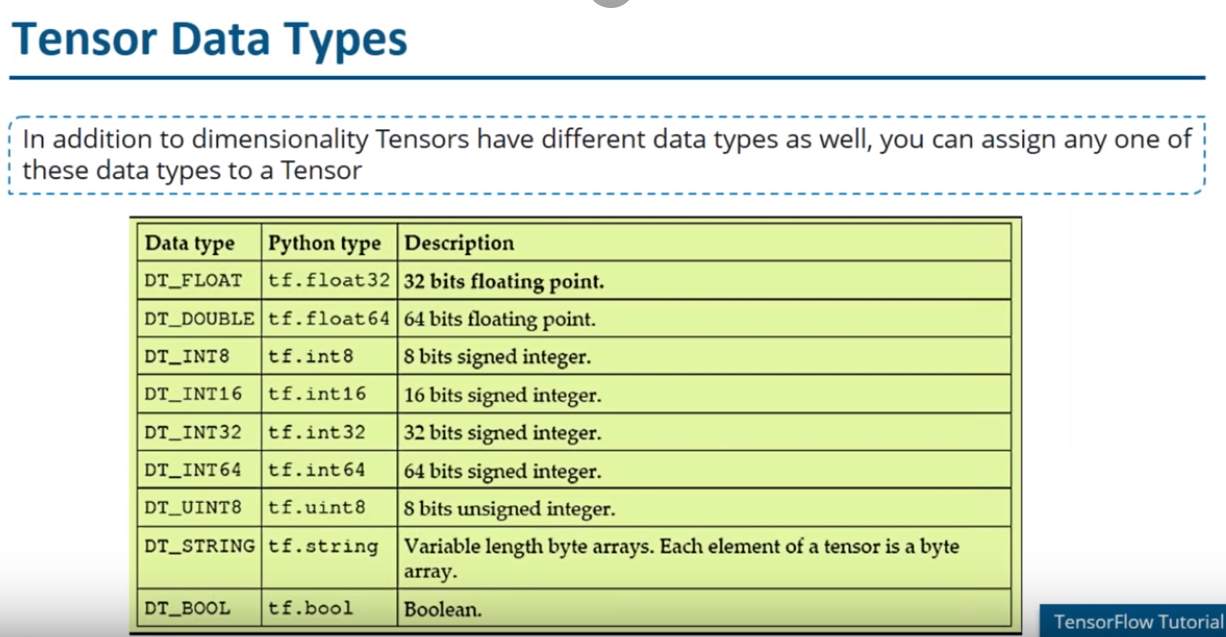

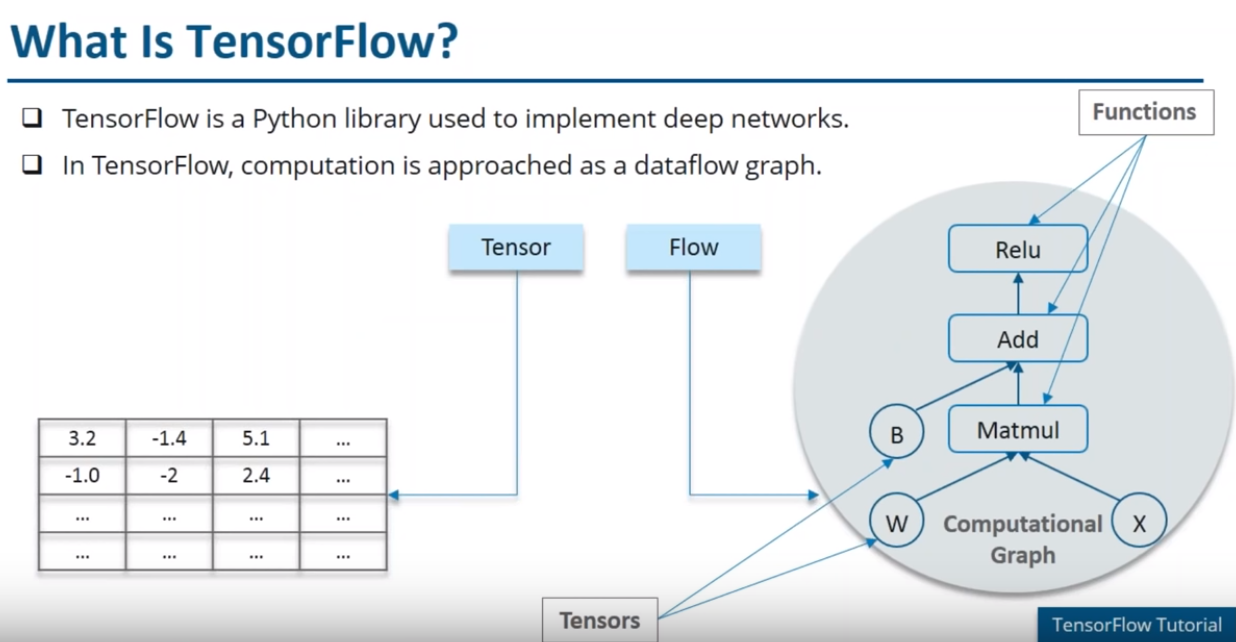

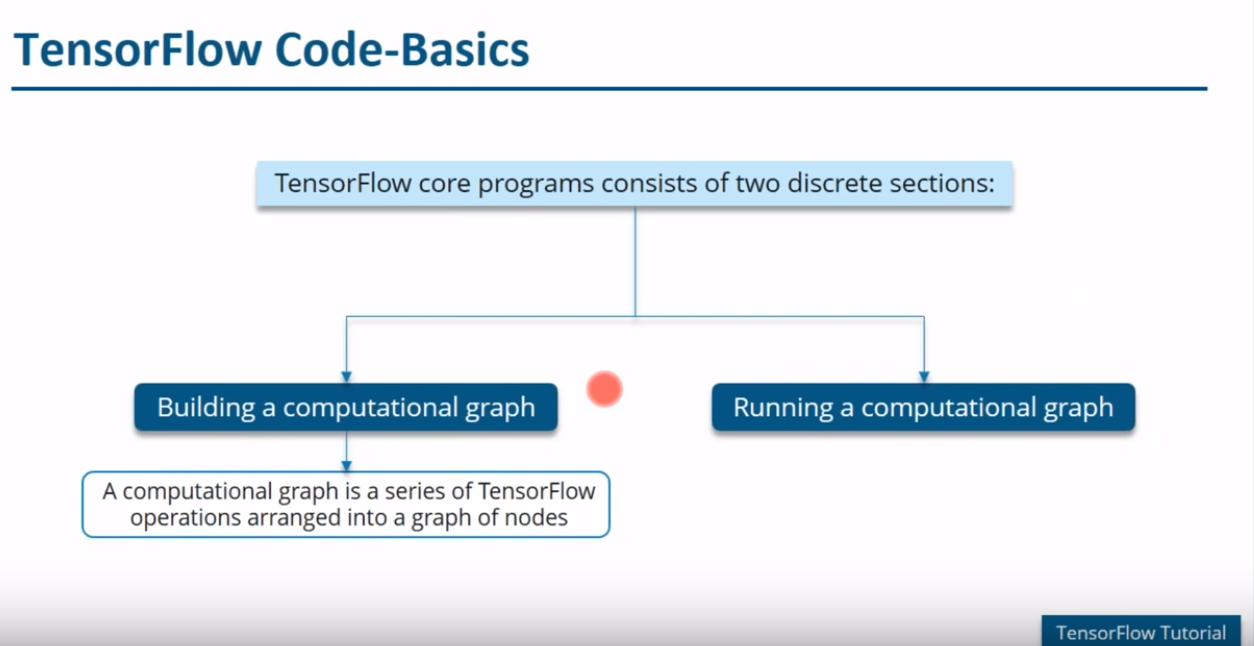

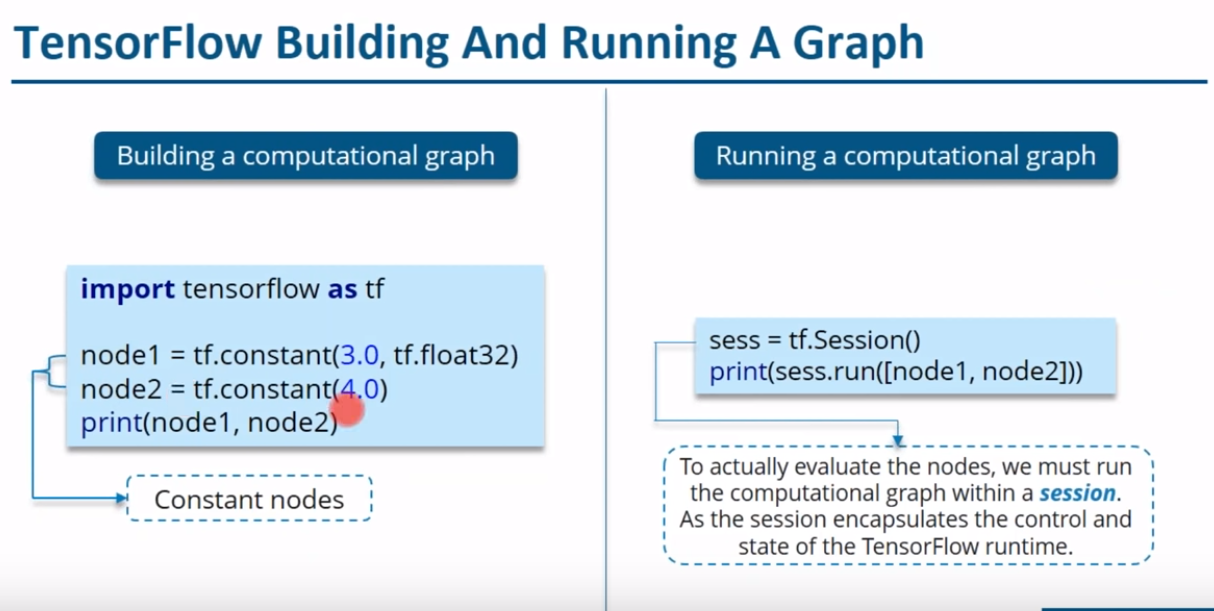



In [1]:
import tensorflow as tf
import os

# Constant sample (with tensorboard)
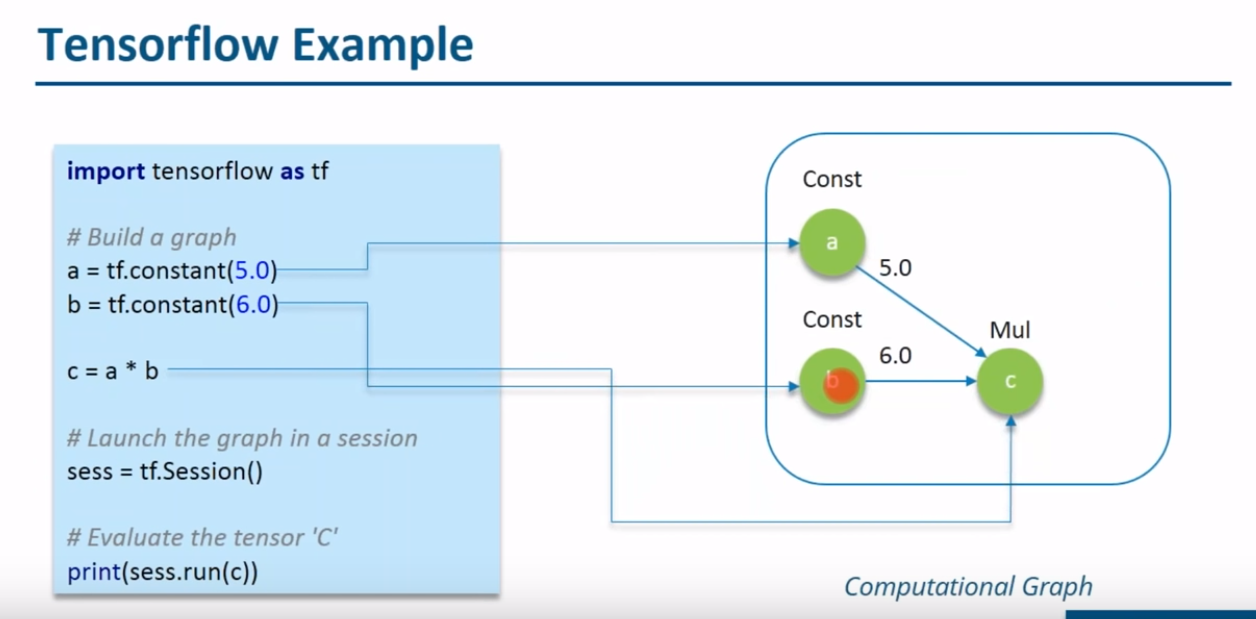

In [4]:
a = tf.constant(5.0)
b = tf.constant(6.0)

c = a * b

sess = tf.Session()
file_writer = tf.summary.FileWriter(os.getcwd(), sess.graph)
file_writer.close()

with tf.Session() as sess:
    print(sess.run(c))

30.0


```console
cd <project_dir> <br />
tensorboard --logdir=.
```

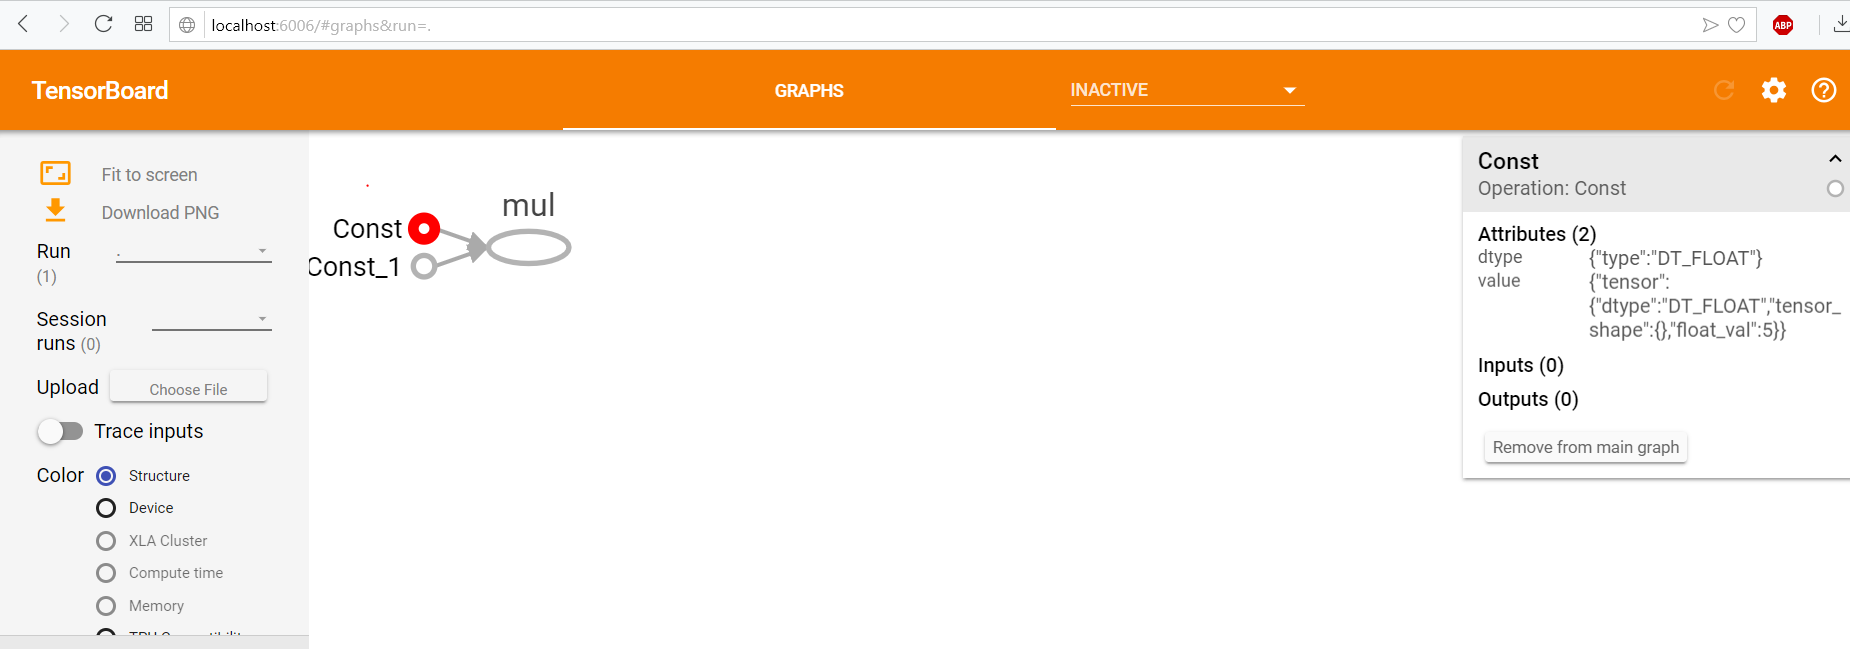

# Placeholder sample
![image.png](attachment:image.png )


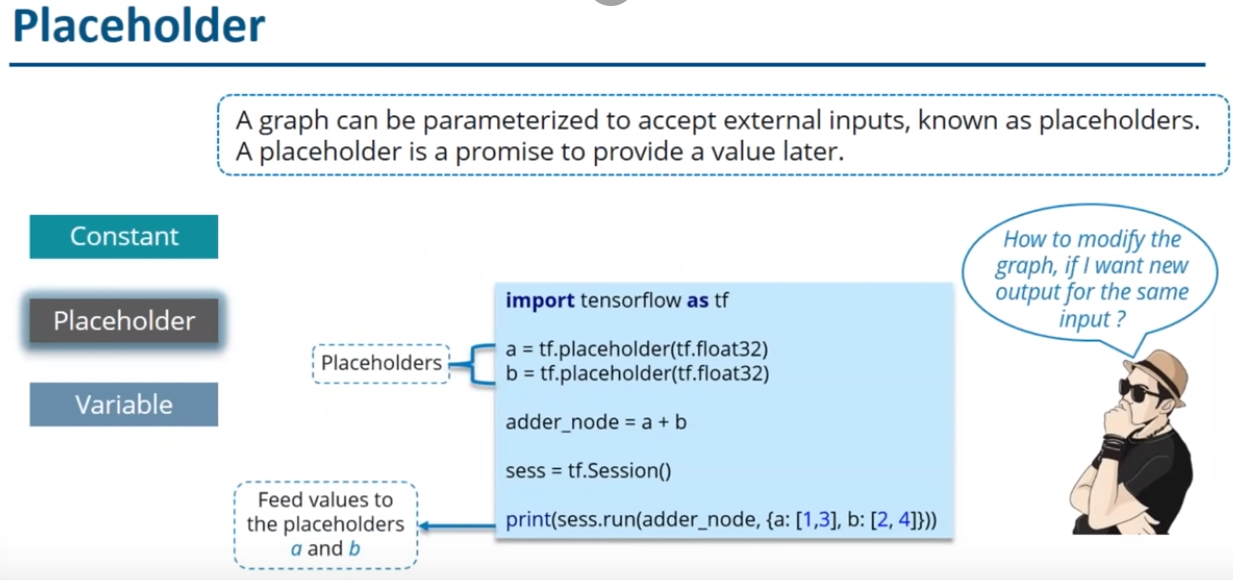

In [38]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b

with tf.Session() as sess:
    res = sess.run(adder_node, {a: [1.3], b: [3.8]})
res

array([ 5.0999999], dtype=float32)

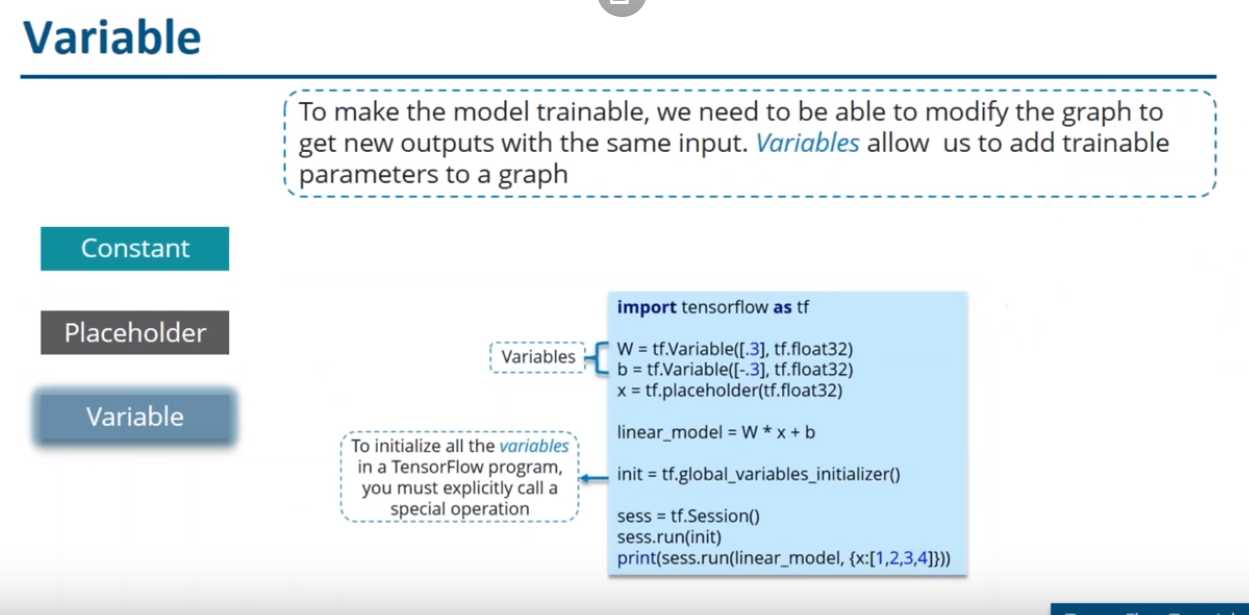

In [45]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)

linear_model = W * x + b

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
sess.run(linear_model, {x: [1, 2, 3, 4]})

array([ 0.        ,  0.30000001,  0.60000002,  0.90000004], dtype=float32)

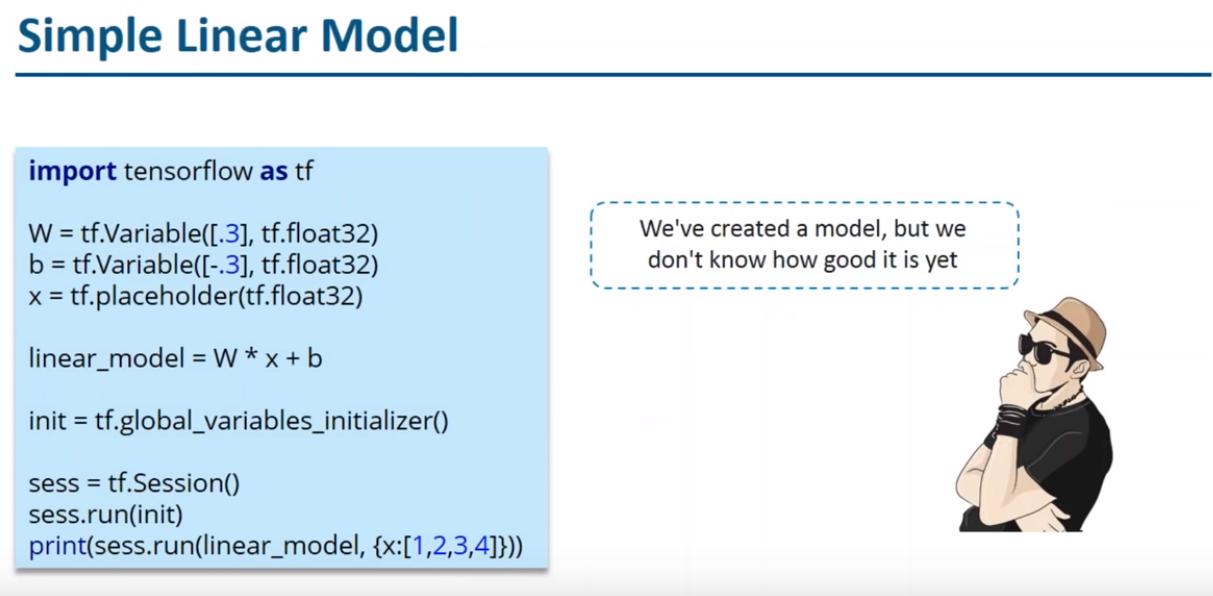

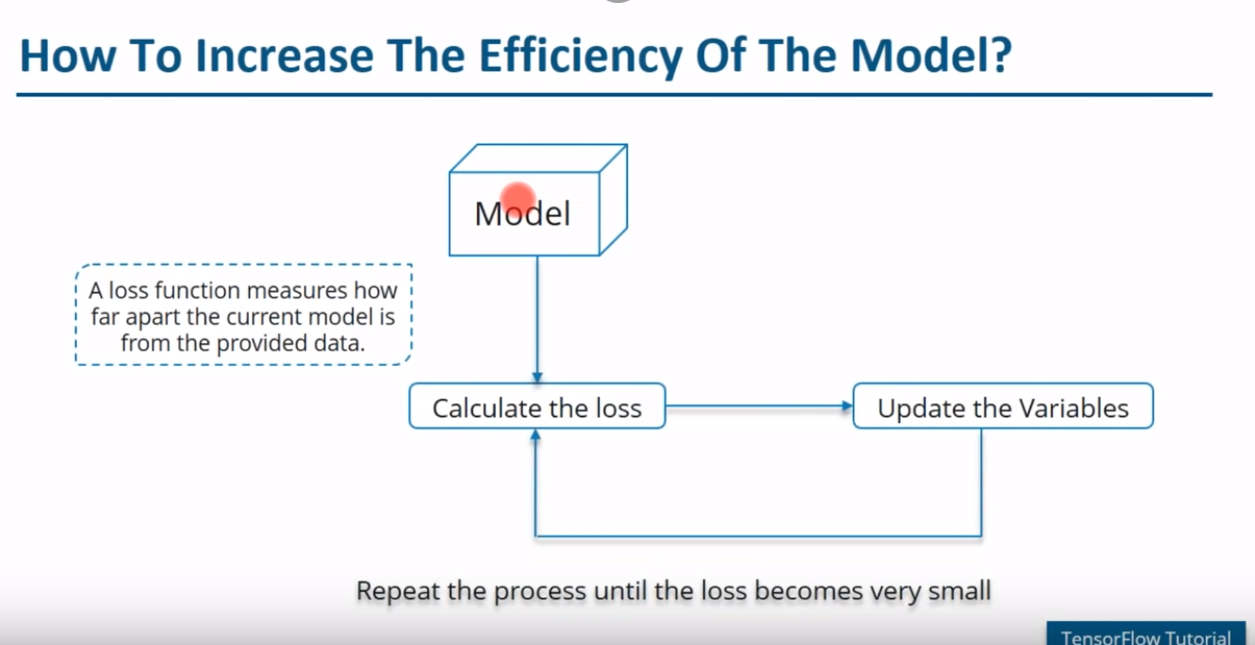

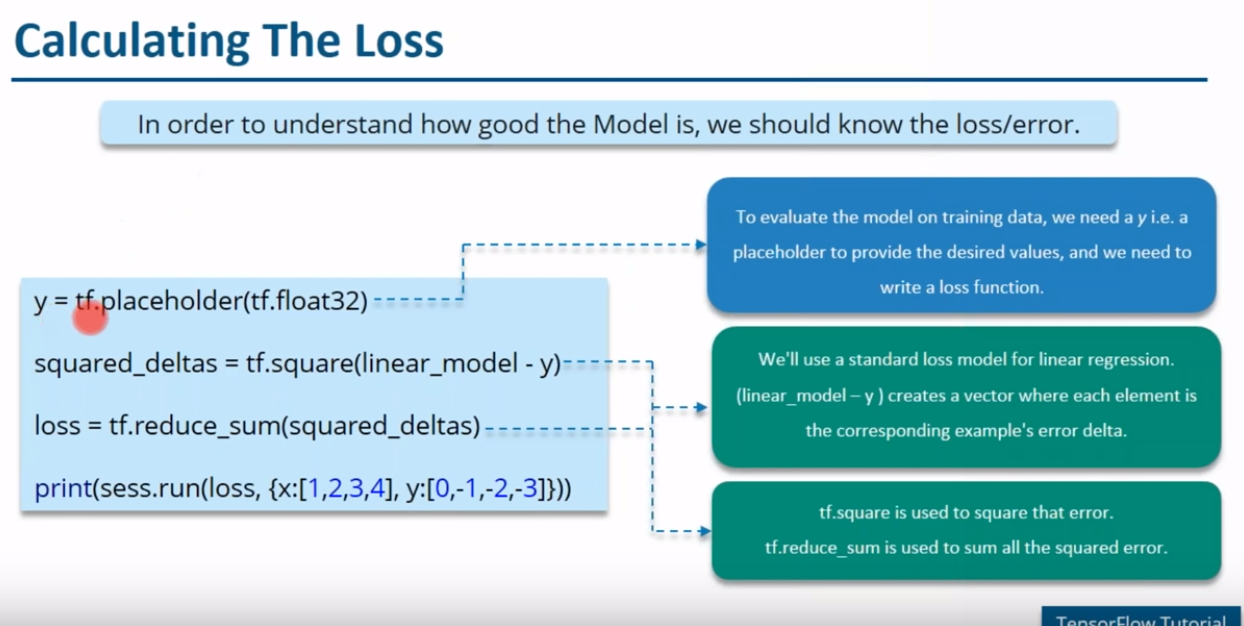

In [46]:
# Model parameters
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)

#Inputs and outputs
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

#Loss
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)


init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
res = sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
sess.close()
res

23.660002

If **W = -1** and **b = 1**, then **loss = 0**

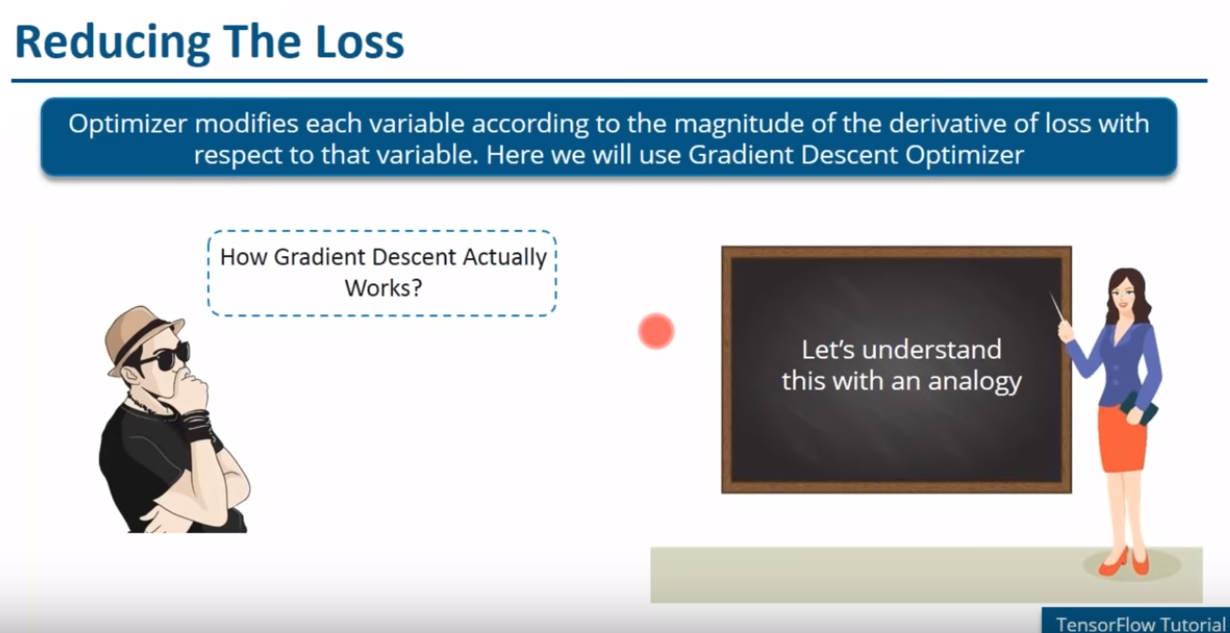

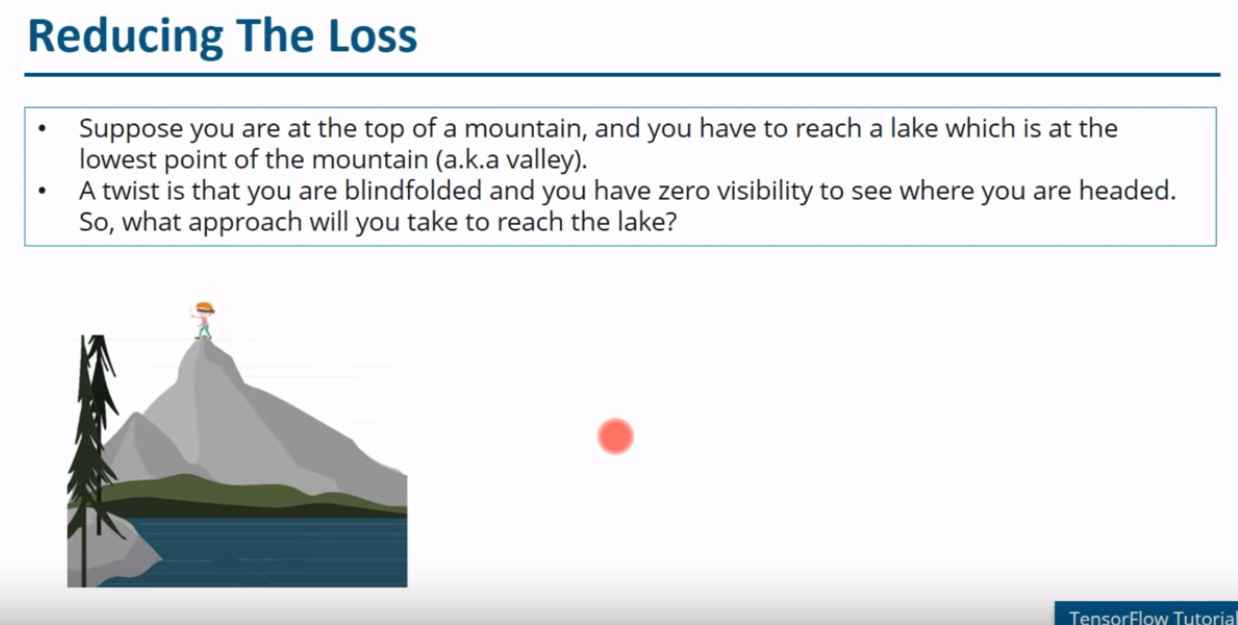

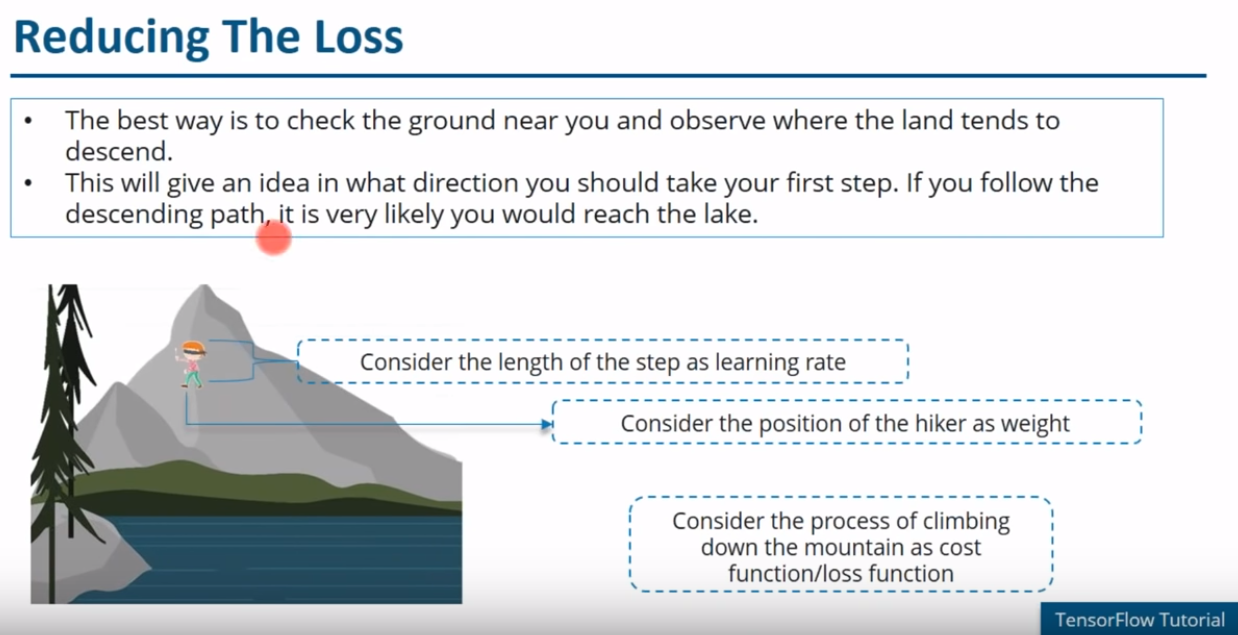

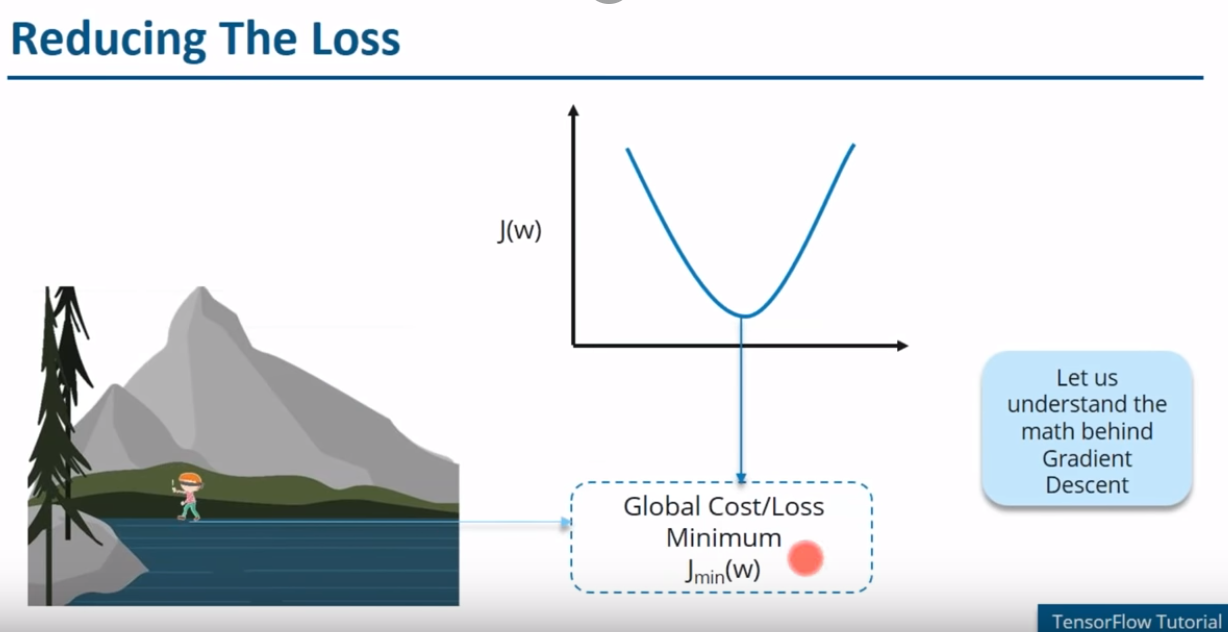

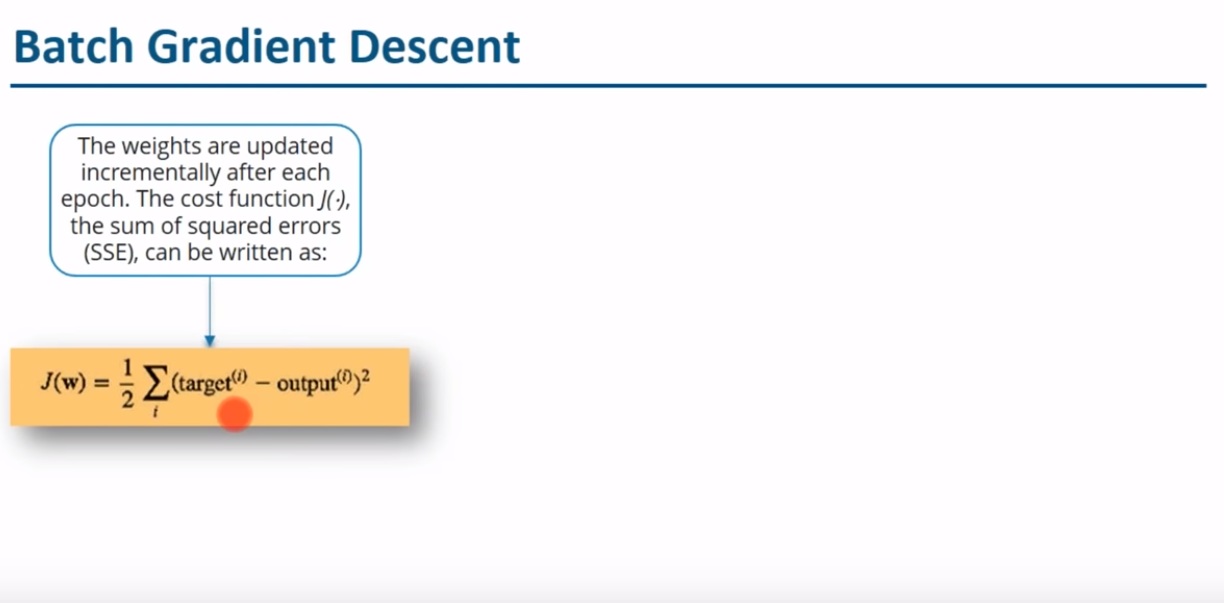

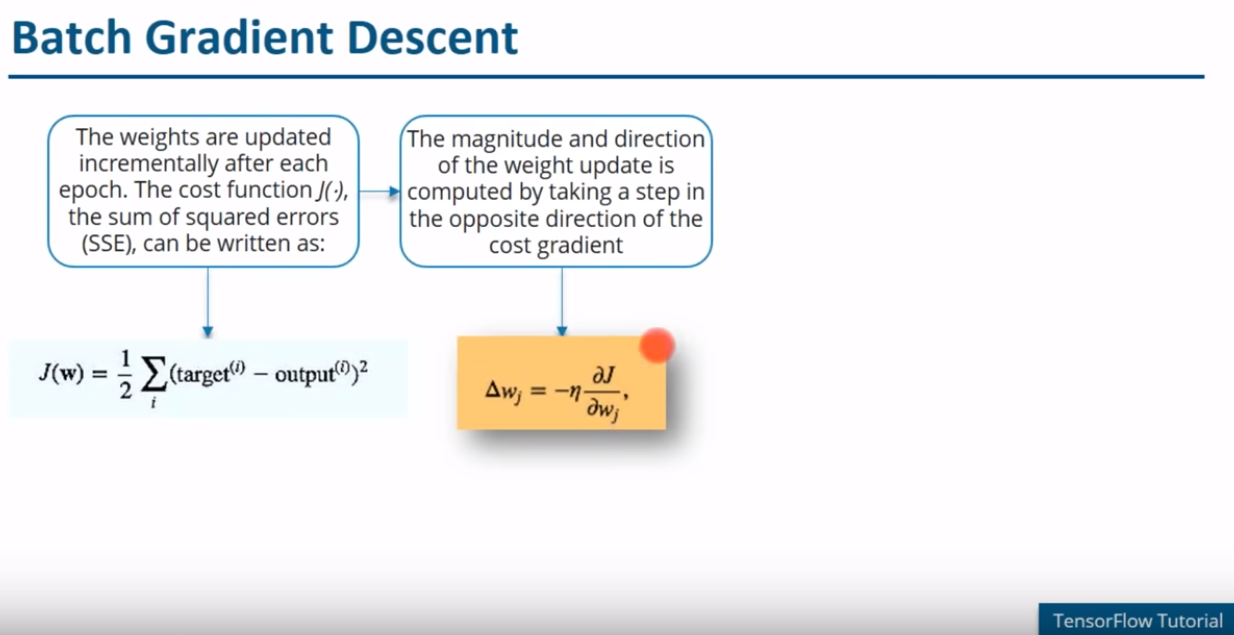

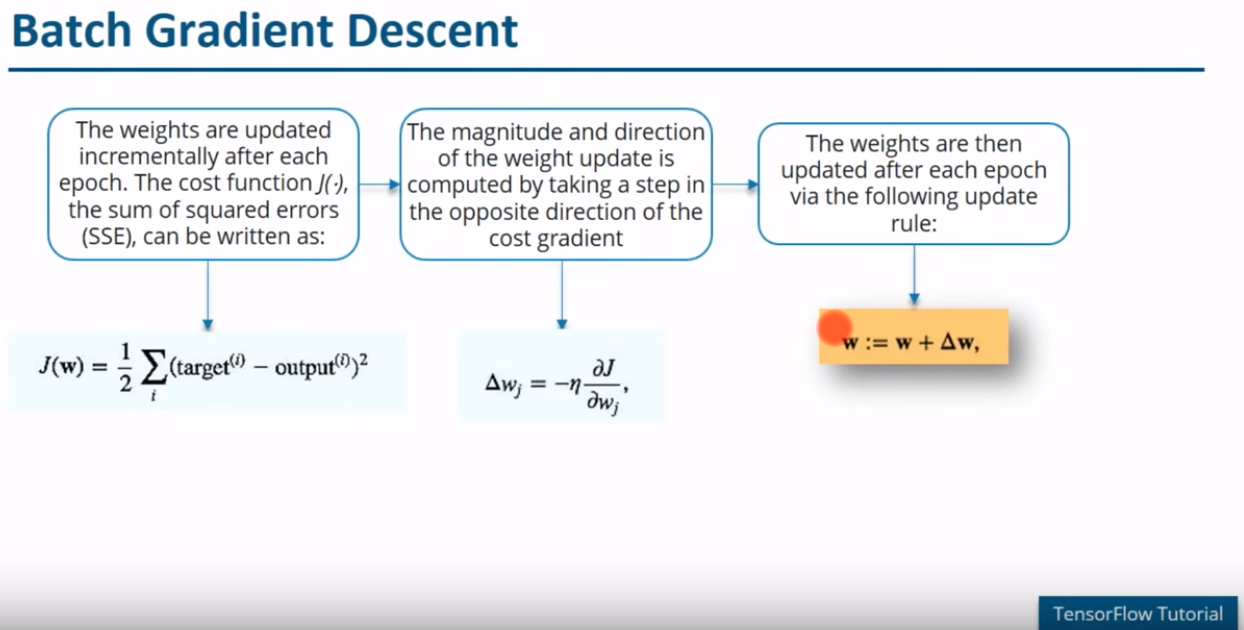

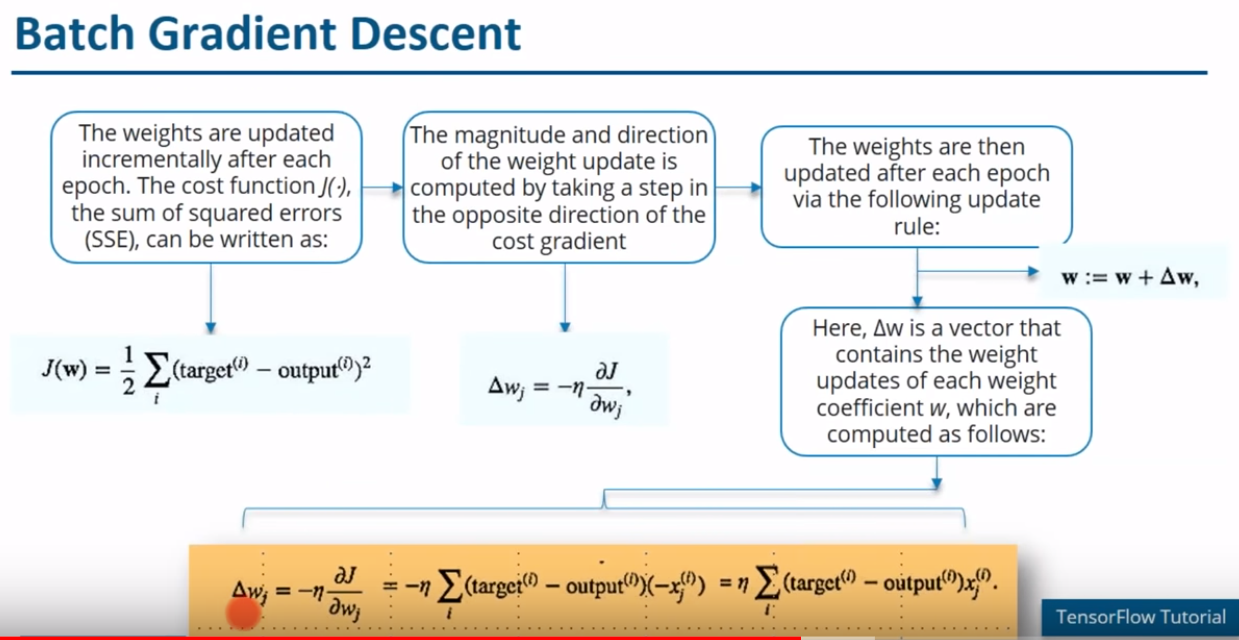

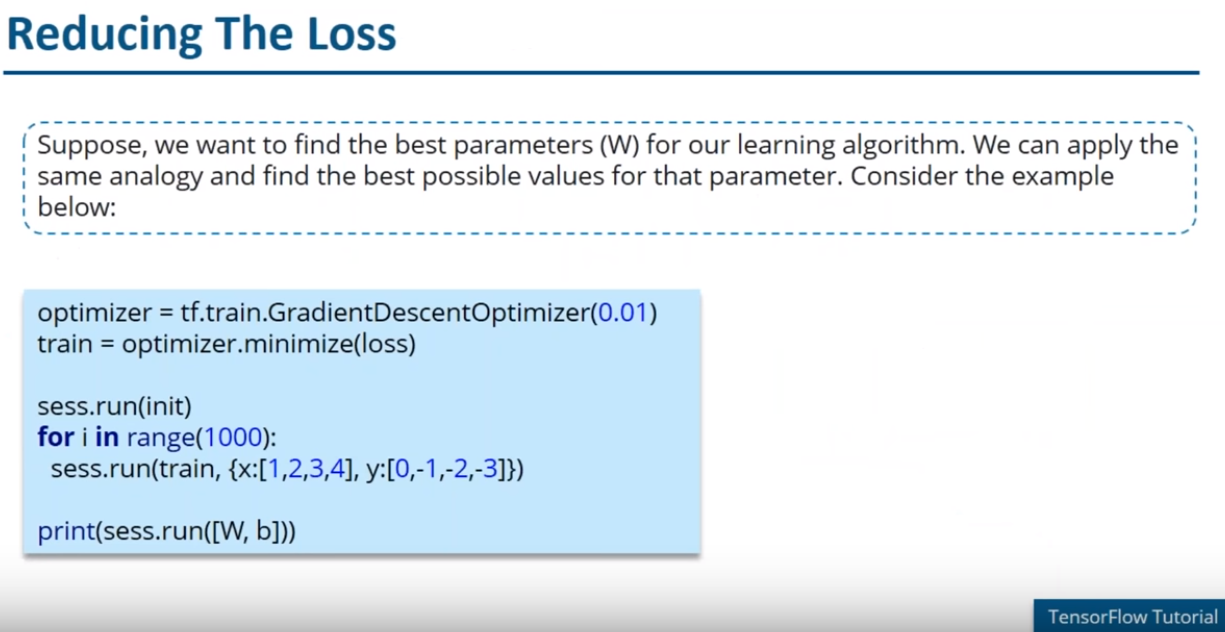

In [51]:
# Model parameters
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)

#Inputs and outputs
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

#Loss
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

#optimize
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

res = sess.run([W, b])
sess.close()
res

[array([-0.99998975], dtype=float32), array([ 0.99997061], dtype=float32)]